# Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Считываю данные

In [2]:
data = pd.read_excel('transactions.xlsx')

In [3]:
data.head()

,Дата продажи,Чек,Клиент,Товар,Товарная группа,Кол-во,Сумма
0,2017-09-01,code000000001,client13166,sku8444,Скобяные изделия,1,29
1,2017-09-01,code000000001,client13166,sku12545,Оборудование для сада и дачи,1,329
2,2017-09-01,code000000001,client13166,sku3391,Инструменты,1,169
3,2017-09-01,code000000001,client13166,sku20444,Инструменты,2,578
4,2017-09-01,code000000002,client1239,sku29959,Скобяные изделия,1,329


In [42]:
data.shape

(1008688, 7)

# Блок 1: Инфографика для Дат продаж

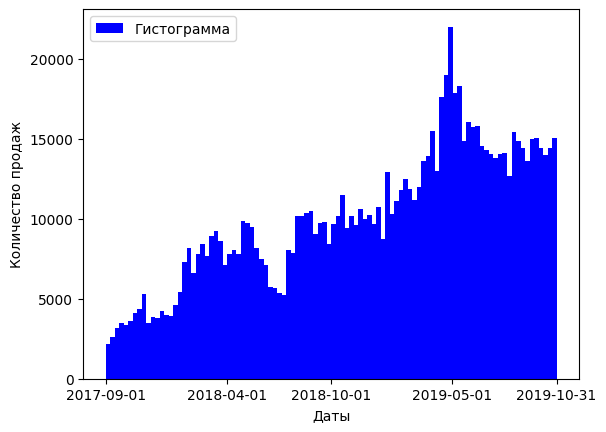

In [4]:
plt.hist(data['Дата продажи'], bins=100, color='blue', label='Гистограмма')
plt.xlabel('Даты')
plt.ylabel('Количество продаж')
plt.legend()
plt.xticks([data['Дата продажи'].min(), '2018-04-01 00:00:00', 
            '2018-10-01 00:00:00', '2019-05-01 00:00:00', data['Дата продажи'].max()])
plt.show()

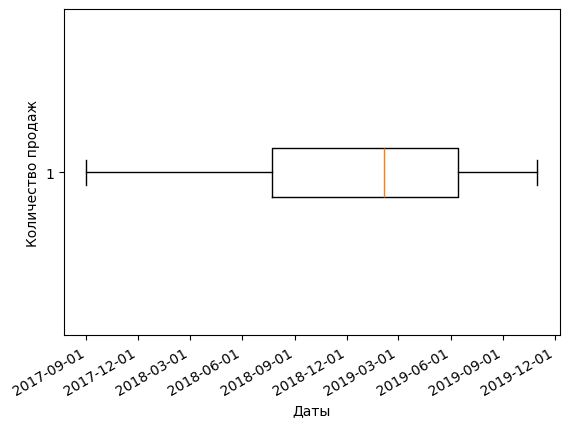

In [5]:
plt.boxplot(mdates.date2num(data['Дата продажи']), vert=False)
plt.xlabel('Даты')
plt.ylabel('Количество продаж')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

In [41]:
print(f"Минимум: {data['Дата продажи'].min()}\nМаксимум: {data['Дата продажи'].max()}\n"
      f"Среднее: {data['Дата продажи'].mean()}\nСтандартное отклонение: {data['Дата продажи'].std()}\n"
      f"Пропуски: {data['Дата продажи'].isna().sum()}")

Минимум: 2017-09-01 00:00:00
Максимум: 2019-10-31 00:00:00
Среднее: 2018-12-26 04:42:17.924908544
Стандартное отклонение: 207 days 17:30:00.314663248
Пропуски: 0


# Блок 1: Гистограмма для товаров по их количеству, процентам, отсортировано по убыванию

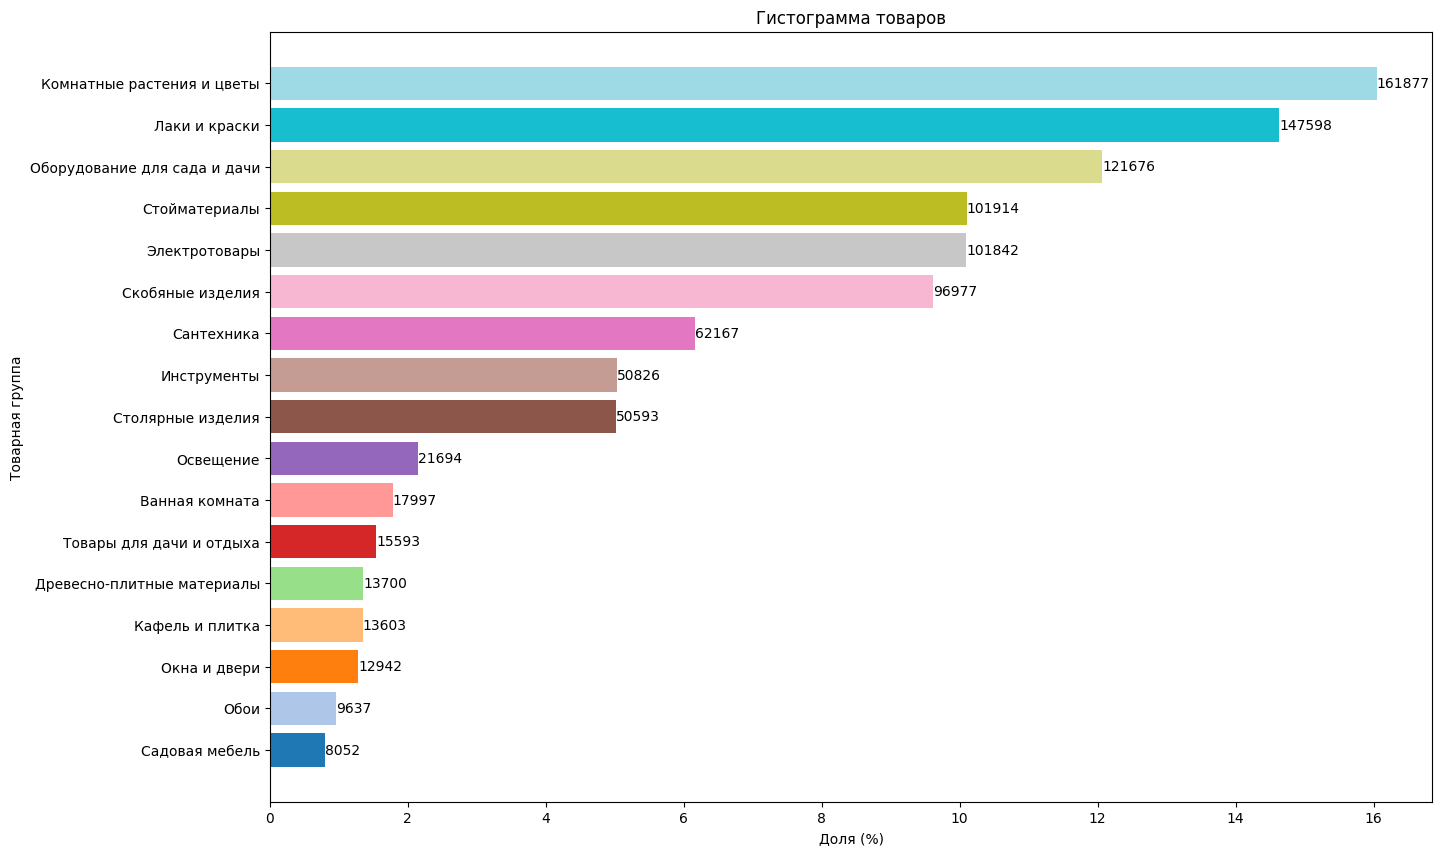

In [39]:
product_group_counts = data['Товарная группа'].value_counts()
product_group_counts = product_group_counts.sort_values()
total_count = product_group_counts.sum()
product_group_percent = (product_group_counts / total_count) * 100
colors = plt.cm.get_cmap('tab20', len(product_group_counts))

plt.figure(figsize=(15, 10))

bars = plt.barh(product_group_counts.index, product_group_percent, color=colors(range(len(product_group_counts))))

for bar, count in zip(bars, product_group_counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{int(count)}', va='center')

plt.xlabel('Доля (%)')
plt.ylabel('Товарная группа')
plt.title('Гистограмма товаров')
plt.show()

# Блок 1: Топ N товаров

In [8]:
group = data.groupby('Товар').agg({'Кол-во': 'sum', 'Сумма': 'sum'})
group

,Кол-во,Сумма
Товар,,
sku1,11,405
sku10,10,17350
sku100,162,47010
sku1000,104,1717
sku10000,77,7447
...,...,...
sku9995,24,47400
sku9996,2,238
sku9997,5,827


In [9]:
top5 = group.sort_values(by='Сумма', ascending=False).head(5)
top5

,Кол-во,Сумма
Товар,,
sku26161,18902,5373638
sku18199,7250,3951361
sku21947,15304,3918570
sku28128,7705,3027786
sku8342,3512,2113158


In [10]:
def topN(data, N):
    group = data.groupby('Товар').agg({'Кол-во': 'sum', 'Сумма': 'sum'})
    topn = group.sort_values(by='Сумма', ascending=False).head(N)
    return topn

topN(data, 10)

,Кол-во,Сумма
Товар,,
sku26161,18902,5373638
sku18199,7250,3951361
sku21947,15304,3918570
sku28128,7705,3027786
sku8342,3512,2113158
sku29626,13669,1973964
sku9018,3299,1706341
sku9471,5045,1675843
sku25074,6125,1668585


# Блок 2: Top 5  за Последние 6 месяцев

In [11]:
latest_date = data['Дата продажи'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)

filtered_data = data[data['Дата продажи'] > six_months_ago] # Последние 6 месяцев
filtered_data

,Дата продажи,Чек,Клиент,Товар,Товарная группа,Кол-во,Сумма
660951,2019-05-01,code000181188,client33515,sku16367,Лаки и краски,1,759
660952,2019-05-01,code000181188,client33515,sku5729,Лаки и краски,1,47
660953,2019-05-01,code000181188,client33515,sku5784,Древесно-плитные материалы,2,1396
660954,2019-05-01,code000181189,client30977,sku19113,Электротовары,1,159
660955,2019-05-01,code000181190,client18575,sku14992,Инструменты,1,599
...,...,...,...,...,...,...,...
1008683,2019-10-31,code000290228,client25258,sku5837,Скобяные изделия,1,89
1008684,2019-10-31,code000290228,client25258,sku26161,Стойматериалы,2,598
1008685,2019-10-31,code000290228,client25258,sku20658,Сантехника,1,159
1008686,2019-10-31,code000290229,client22472,sku16069,Столярные изделия,1,85


In [12]:
topN(filtered_data, 5)

,Кол-во,Сумма
Товар,,
sku26161,7956,2369617
sku18199,3055,1843623
sku21947,5816,1540184
sku8342,1509,970053
sku22208,88,886285


# Блок 2: ABC-XYZ анализ

In [13]:
group = data.groupby('Товар').agg({'Кол-во': 'sum', 'Сумма': 'sum'})
abc_data = group.sort_values(by='Сумма', ascending=False).copy()

abc_data['Накопительная сумма'] = abc_data['Сумма'].cumsum()

abc_data['Вклад нарастающим итогом'] = 100 * abc_data['Накопительная сумма'] / abc_data['Сумма'].sum()

def categorize_abc(row):
    if row['Вклад нарастающим итогом'] <= 80:
        return 'A'
    elif row['Вклад нарастающим итогом'] <= 95:
        return 'B'
    else:
        return 'C'

abc_data['Группа_ABC'] = abc_data.apply(categorize_abc, axis=1)

abc_data[['Сумма', 'Вклад нарастающим итогом', 'Группа_ABC']]

,Сумма,Вклад нарастающим итогом,Группа_ABC
Товар,,,
sku26161,5373638,0.854847,A
sku18199,3951361,1.483435,A
sku21947,3918570,2.106808,A
sku28128,3027786,2.588473,A
sku8342,2113158,2.924637,A
...,...,...,...
sku20003,2,99.999999,C
sku24554,1,100.000000,C
sku25319,1,100.000000,C


In [14]:
xyz_data = data.groupby('Товар').agg({'Кол-во': ['mean', 'std']})
xyz_data.columns = ['Среднее значение', 'Std']
xyz_data['Std'] = xyz_data['Std'].fillna(0)

xyz_data['Коэффициент вариации, %'] = xyz_data.apply(lambda row: row['Std'] / row['Среднее значение'] if row['Среднее значение'] != 0 else float('inf'), axis=1)

def categorize_xyz(row):
    if row['Коэффициент вариации, %'] < 0.1:
        return 'X'
    elif row['Среднее значение'] == 0 or row['Коэффициент вариации, %'] < 0.25:
        return 'Y'
    else:
        return 'Z'
xyz_data['Группа_XYZ'] = xyz_data.apply(categorize_xyz, axis=1)
xyz_data['Коэффициент вариации, %'] *= 100
xyz_data[['Группа_XYZ', 'Коэффициент вариации, %', 'Среднее значение']]

,Группа_XYZ,"Коэффициент вариации, %",Среднее значение
Товар,,,
sku1,Z,37.639940,1.375000
sku10,Z,61.237244,2.000000
sku100,Z,63.260430,1.396552
sku1000,Z,52.635279,1.268293
sku10000,Z,117.086403,2.483871
...,...,...,...
sku9995,Z,56.891187,1.600000
sku9996,X,0.000000,1.000000
sku9997,X,0.000000,1.000000


In [15]:
ABC_XYZ = abc_data[['Сумма', 'Вклад нарастающим итогом', 'Группа_ABC']].join(xyz_data[['Группа_XYZ', 'Коэффициент вариации, %', 'Среднее значение']])
ABC_XYZ.sort_values(by='Сумма', ascending=False)

,Сумма,Вклад нарастающим итогом,Группа_ABC,Группа_XYZ,"Коэффициент вариации, %",Среднее значение
Товар,,,,,,
sku26161,5373638,0.854847,A,Z,145.180881,3.141955
sku18199,3951361,1.483435,A,Z,155.735680,7.011605
sku21947,3918570,2.106808,A,Z,101.834384,3.163291
sku28128,3027786,2.588473,A,Z,200.074746,10.300802
sku8342,2113158,2.924637,A,Z,120.912761,11.986348
...,...,...,...,...,...,...
sku20003,2,99.999999,C,X,0.000000,1.000000
sku24554,1,100.000000,C,X,0.000000,1.000000
sku25319,1,100.000000,C,X,0.000000,1.000000


# Блок 2: визуализатор куб

In [16]:
cube = ABC_XYZ.pivot_table(
    values='Коэффициент вариации, %', 
    index='Группа_ABC', 
    columns='Группа_XYZ', 
    aggfunc='count', 
    margins=True, 
    margins_name='Итого', 
    fill_value=0
)

cube

Группа_XYZ,X,Y,Z,Итого
Группа_ABC,,,,
A,1433,391,3529,5353
B,2507,462,5265,8234
C,7527,685,8767,16979
Итого,11467,1538,17561,30566


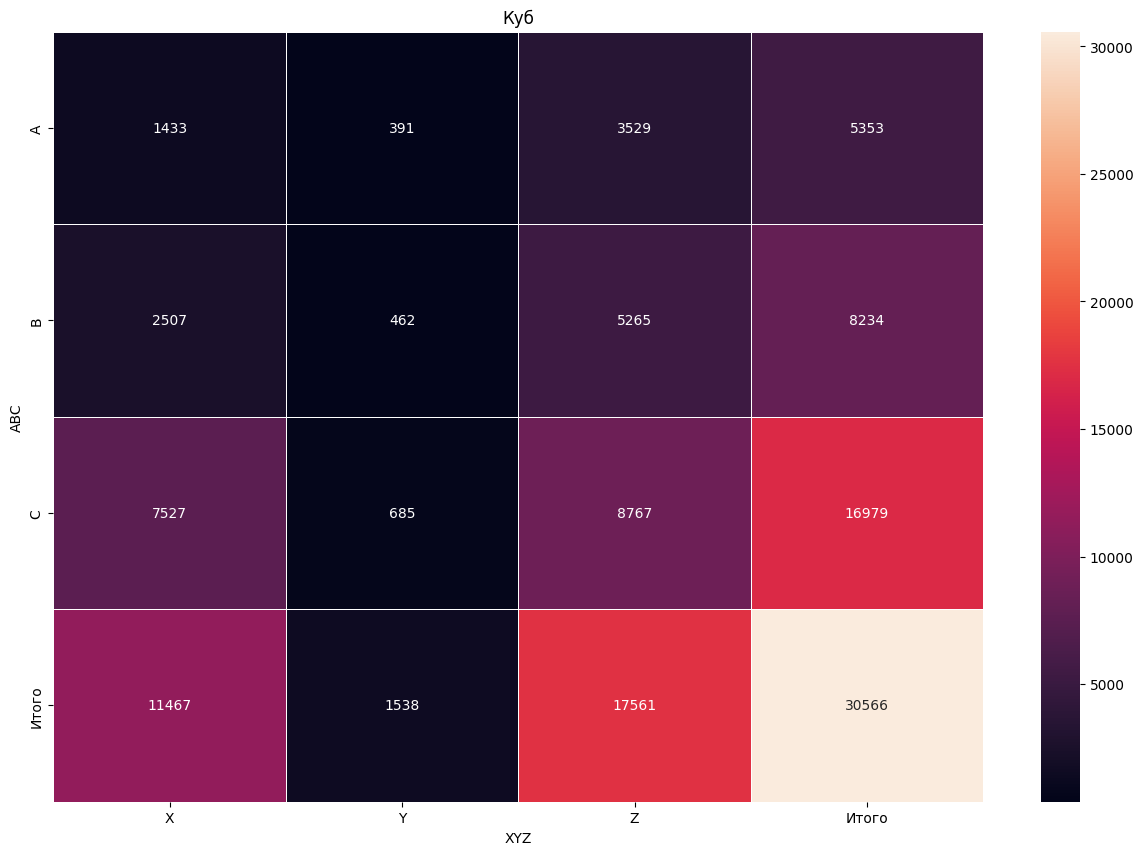

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(cube, annot=True, fmt="d", linewidths=.5)
plt.title('Куб')
plt.xlabel('XYZ')
plt.ylabel('ABC')
plt.show()

# Блок 3: EDA

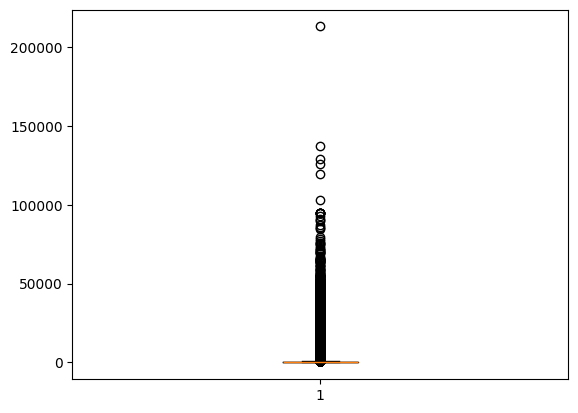

In [18]:
plt.boxplot(data['Сумма'])
plt.show()

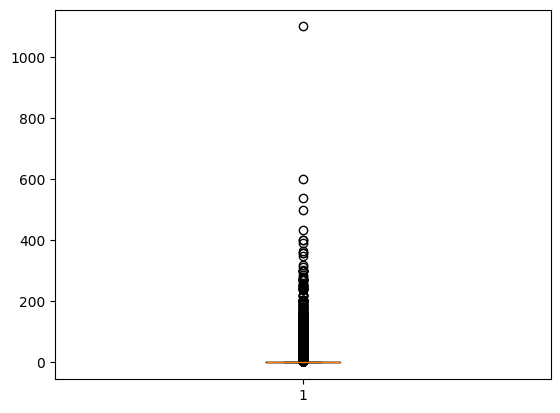

In [19]:
plt.boxplot(data['Кол-во'])
plt.show()

In [20]:
data_more_200 = data[data['Кол-во'] > 200]
data_less_200 = data[data['Кол-во'] <= 200]
data_more_200.shape

(53, 7)

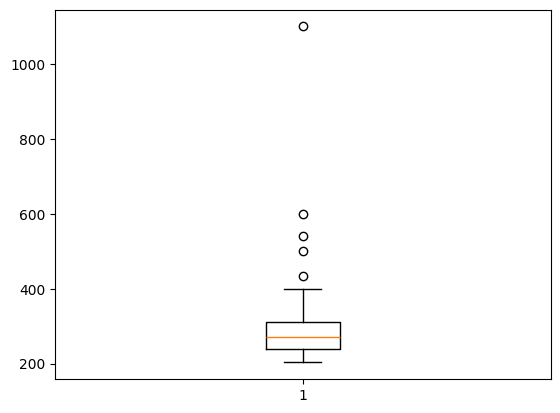

In [21]:
plt.boxplot(data_more_200['Кол-во'])
plt.show()

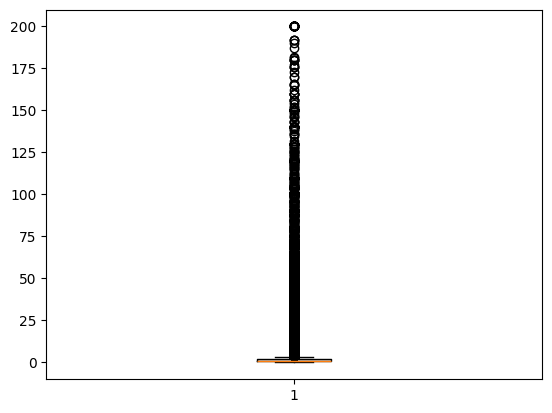

In [22]:
plt.boxplot(data_less_200['Кол-во'])
plt.show()

In [23]:
group = data_less_200.groupby('Клиент').agg({'Кол-во': 'sum', 'Сумма': 'sum'})
group

,Кол-во,Сумма
Клиент,,
client1,9,2273
client10,3,4757
client100,7,8063
client1000,309,44853
client10000,5,8495
...,...,...
client9995,3,3677
client9996,1,2499
client9997,24,17691


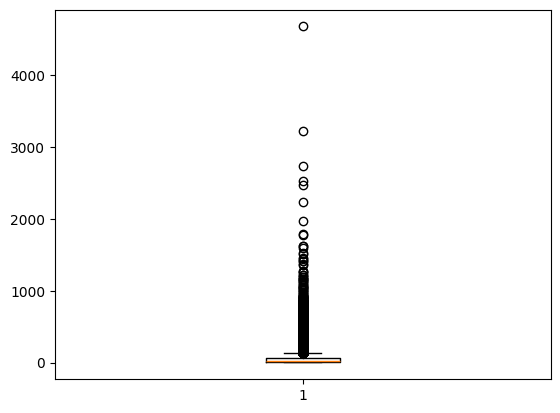

In [24]:
plt.boxplot(group['Кол-во'])
plt.show() 

In [25]:
extreme_group = group[(group['Кол-во'] >= 2000) | (group['Сумма'] >= 500000)] # Экстремальная группа с количество >= 2000 и суммой >= 500000
extreme_group

,Кол-во,Сумма
Клиент,,
client15654,4677,1300515
client1704,1187,636101
client20310,2741,348743
client29182,3218,3868025
client30977,2234,407138
client33032,1255,537397
client34081,2470,386355
client37582,2526,502515
client8778,1617,986618


# Блок 3: 1 визит

In [26]:
group_with_dates = data_less_200.groupby('Клиент').agg({'Кол-во': 'sum', 'Сумма': 'sum', 'Дата продажи': 'nunique'})
group_with_dates

,Кол-во,Сумма,Дата продажи
Клиент,,,
client1,9,2273,1
client10,3,4757,1
client100,7,8063,3
client1000,309,44853,16
client10000,5,8495,1
...,...,...,...
client9995,3,3677,2
client9996,1,2499,1
client9997,24,17691,3


In [27]:
group_with_dates[group_with_dates['Дата продажи'] == 1] # 1 визит

,Кол-во,Сумма,Дата продажи
Клиент,,,
client1,9,2273,1
client10,3,4757,1
client10000,5,8495,1
client10006,27,4493,1
client10008,1,2999,1
...,...,...,...
client9988,7,2381,1
client9989,1,2999,1
client9992,7,471,1


# Блок 3: Цена продажи товара в каждой транзакции

In [28]:
data_without_null = data[data['Кол-во'] != 0]
data_without_null

,Дата продажи,Чек,Клиент,Товар,Товарная группа,Кол-во,Сумма
0,2017-09-01,code000000001,client13166,sku8444,Скобяные изделия,1,29
1,2017-09-01,code000000001,client13166,sku12545,Оборудование для сада и дачи,1,329
2,2017-09-01,code000000001,client13166,sku3391,Инструменты,1,169
3,2017-09-01,code000000001,client13166,sku20444,Инструменты,2,578
4,2017-09-01,code000000002,client1239,sku29959,Скобяные изделия,1,329
...,...,...,...,...,...,...,...
1008683,2019-10-31,code000290228,client25258,sku5837,Скобяные изделия,1,89
1008684,2019-10-31,code000290228,client25258,sku26161,Стойматериалы,2,598
1008685,2019-10-31,code000290228,client25258,sku20658,Сантехника,1,159
1008686,2019-10-31,code000290229,client22472,sku16069,Столярные изделия,1,85


In [29]:
data_without_null['Цена продажи'] = np.round(data_without_null['Сумма']/data_without_null['Кол-во'], 2)
data_without_null

,Дата продажи,Чек,Клиент,Товар,Товарная группа,Кол-во,Сумма,Цена продажи
0,2017-09-01,code000000001,client13166,sku8444,Скобяные изделия,1,29,29.00
1,2017-09-01,code000000001,client13166,sku12545,Оборудование для сада и дачи,1,329,329.00
2,2017-09-01,code000000001,client13166,sku3391,Инструменты,1,169,169.00
3,2017-09-01,code000000001,client13166,sku20444,Инструменты,2,578,289.00
4,2017-09-01,code000000002,client1239,sku29959,Скобяные изделия,1,329,329.00
...,...,...,...,...,...,...,...,...
1008683,2019-10-31,code000290228,client25258,sku5837,Скобяные изделия,1,89,89.00
1008684,2019-10-31,code000290228,client25258,sku26161,Стойматериалы,2,598,299.00
1008685,2019-10-31,code000290228,client25258,sku20658,Сантехника,1,159,159.00
1008686,2019-10-31,code000290229,client22472,sku16069,Столярные изделия,1,85,85.00


In [30]:
data_without_null.groupby('Товар').agg({'Цена продажи': 'mean'})

,Цена продажи
Товар,
sku1,39.062500
sku10,1776.000000
sku100,287.806034
sku1000,16.536585
sku10000,97.720968
...,...
sku9995,1960.600000
sku9996,119.000000
sku9997,165.400000
